In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score


In [2]:
cd '/content/drive/My Drive/Colab Notebooks/dw_matrix'

/content/drive/My Drive/Colab Notebooks/dw_matrix


In [3]:
ls data


men-shoes.csv


In [6]:
df = pd.read_csv('data/men-shoes.csv',low_memory=False)
df.shape

(18280, 48)

In [7]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [9]:
mean_price = np.mean(df['prices_amountmin']) #wartosc srednia z kolumny
mean_price

93.53952188183217

In [11]:
[7] *5

[7, 7, 7, 7, 7]

In [14]:
y_true = df['prices_amountmin'] #wartosc prawidlowa
y_true.shape[0] 

18280

In [15]:
y_pred = [mean_price] * y_true.shape[0] #wartosc ktora chcemy przewidziec
mean_absolute_error(y_true,y_pred)

63.968341227870624

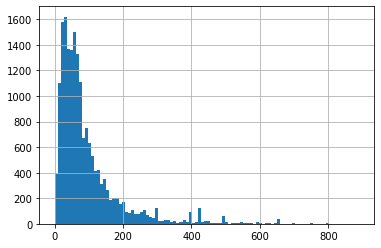

In [16]:
 df['prices_amountmin'].hist(bins=100)

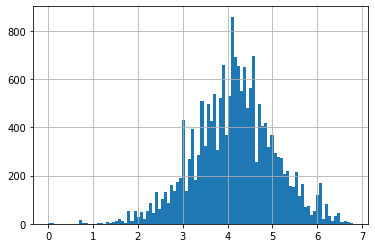

In [17]:
 np.log1p(df['prices_amountmin']).hist(bins=100)

In [18]:
y_true = df['prices_amountmin'] #wartosc prawidlowa
y_pred = [np.median(y_true)] * y_true.shape[0] #wartosc ktora chcemy przewidziec

mean_absolute_error(y_true,y_pred) #sprawdzenie na ile dobrze radzi sobie model

58.01120240700219

In [22]:
y_true = df['prices_amountmin'] #wartosc prawidlowa
price_log_mean = np.expm1(np.mean( np.log1p(y_true)))
y_pred = [price_log_mean] * y_true.shape[0] #wartosc ktora chcemy przewidziec

mean_absolute_error(y_true,y_pred) #sprawdzenie na ile dobrze radzi sobie model

58.03539547661041

In [23]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [25]:
df.brand.value_counts()

Nike                       1709
PUMA                        574
Ralph Lauren                524
New Balance                 361
VANS                        356
                           ... 
Eros                          1
Polo Sport Ralph Lauren       1
1031                          1
Gore Bike Wear                1
Akadema                       1
Name: brand, Length: 1856, dtype: int64

In [0]:
df['brand_cat'] = df['brand'].factorize()[0]

In [34]:
feats = ['brand_cat']
X = df[feats].values
y = df['prices_amountmin'].values

model = DecisionTreeRegressor(max_depth=5)
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
np.mean(scores), np.std(scores)

(-58.38655694633361, 4.223555478221712)

In [32]:
#import sklearn
#sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [0]:
def run_model(feats):
  
    X = df[feats].values
    y = df['prices_amountmin'].values

    model = DecisionTreeRegressor(max_depth=5)
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
    return np.mean(scores), np.std(scores)

In [38]:
run_model(['brand_cat'])

(-58.38655694633361, 4.223555478221712)

In [40]:
df['manufacturer_cat'] = df['manufacturer'].factorize()[0]
df['manufacturer_cat']

0         -1
1         -1
2         -1
3         -1
4         -1
        ... 
18275     -1
18276    257
18277     -1
18278     -1
18279     -1
Name: manufacturer_cat, Length: 18280, dtype: int64

In [41]:
run_model(['manufacturer_cat'])

(-63.133649278023746, 3.394307434888982)

In [42]:
run_model(['manufacturer_cat','brand_cat'])

(-58.539304199085976, 4.311223231615441)

In [43]:
ls


data/  HelloGithub.ipynb  LICENSE  matrix_one/  README.md


In [44]:
ls matrix_one

day3.ipynb


In [45]:
ls


data/  HelloGithub.ipynb  LICENSE  matrix_one/  README.md


In [46]:
ls matrix_one/

day3.ipynb  day4.ipynb


In [0]:
!git add matrix_one/day4.ipynb